# Приоритизация гипотез и анализ A/B-теста для увеличения выручки интернет-магазина.

## Описание проекта.

Аналитики крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.


**Цели исследования:**

1. Приоритизация гипотез.
2. Анализ A/B-теста.

**Задачи исследования:** 
1. Приоритизировать ряд гипотез, разработанных совместно с отделом маркетинга
2. Запустить A/B-тест и проанализировать результаты.

**Ход исследования:** <br>
Данные -в файлах:

/datasets/hypothesis.csv <br>
/datasets/orders.csv <br>
/datasets/visitors.csv <br>

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в несколько этапов:

1) Обзор данных.

2) Предобработка данных.

3) Приоритизация гипотез.

4) Анализ A/B-теста, принятие решения по результатам теста и объясните его.

## Загрузка данных и подготовка их к анализу. Часть 1

In [33]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [34]:
try: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') #читаем файл
except:
    hypothesis = pd.read_csv('hypothesis.csv')

In [35]:
pd.options.display.max_colwidth = 100
hypothesis.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


* **Hypothesis** — краткое описание гипотезы;
* **Reach** — охват пользователей по 10-балльной шкале;
* **Impact** — влияние на пользователей по 10-балльной шкале;
* **Confidence** — уверенность в гипотезе по 10-балльной шкале;
* **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Как видно из данных, значения целые, пропусков, дубликатов нет. Но стоит названия колонок перевести в нижний регистр так будет удобнее работать дальше.

In [36]:
# Приводём колонки к нижнему регистру:
hypothesis.columns = map(str.lower, hypothesis.columns)

In [37]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Приоритизация гипотез

### Применение фреймворка ICE для приоритизации гипотез

In [38]:
# Рассчитаем показатель ICE:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']

# Cортируем по результатам ICE:
hypothesis[['hypothesis','ice']].sort_values('ice', ascending=False).round(3)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Видим, что гипотезы № 8, 0 и 7 являются наиболее приоритетными задачами с позиции вероятного влияния их на выручку, без учёта пользовательского охвата. <br>
Наибольшее значение ICE имеет гипотеза №8 - "Запустить акцию, дающую скидку на товар в день рождения".

### Применение фреймворка RICE для приоритизации гипотез

In [39]:
hypothesis['rice'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','rice']].sort_values('rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При расчёте методом RICE видим, что порядок приоитетных гипотиз изменился - тремя самыми перспективными гипотезами будут № 7, 2 и 0. <br>
При расчете RICE на первое место вышла гипотеза №7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [40]:
hypothesis.sort_values(by='ice', ascending=False).round(3)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


С поиощью параметра Reach мы изменили приоритеты: теперь нам видно как много пользователей затронет гипотеза.

Так произошло, потому, что одна формула учитывает охват, а другая — нет. У ice и rice отличается формула одним параметром. И если этот параметр у гипотезы большой, то и rice будет выше соответственно.

**Вывод:**

**Приоритетная гипотеза по ICE** <br>
Лидирует гипотеза "Запустить акцию, дающую скидку на товар в день рождения". У нее больше всего влияния на пользователей и  уверенность в гипотезе по 10-балльной шкале.

**Приоритетная гипотеза по RICE** <br>
Лидирует гипотеза "Добавить форму подписки на все основные страницы, чтобы создать базу клиентов для email-рассылок". Так получилось, потому что ее параметр reach равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

Приоритет гипотез изменился после добавления в формулу расчёта показателя Reach (охват пользователей). Поэтому целесообразнее при определении приоритета гипотезы учитывать не только влияние на пользователей, затраты и степень уверенности в самой гипотезе, но и число пользователей, которых она затронет. Гипотеза 7 получается наиболее перспективна, т.к. помимо высоких impact и confidence, коснётся всех пользователей сайта.

## Загрузка данных и подготовка их к анализу. Часть 2

In [41]:
try:
    orders = pd.read_csv('/datasets/orders.csv') # Извлекаем данные о заказах
except:
    orders = pd.read_csv('orders.csv')

In [42]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [43]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


* **transactionId** — идентификатор заказа;
* **visitorId** — идентификатор пользователя, совершившего заказ;
* **date** — дата, когда был совершён заказ;
* **revenue** — выручка заказа;
* **group** — группа A/B-теста, в которую попал заказ.

In [44]:
# переименуем столбцы
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [45]:
# проверяем наличие явных дубликатов
print('Количество явных дубликатов:', orders.duplicated().sum())

Количество явных дубликатов: 0


In [46]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv') # Извлекаем данные о количестве пользователей
except:
    visitors = pd.read_csv('visitors.csv')

In [47]:
display(visitors.head(10))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [48]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


* **date** — дата;
* **group** — группа A/B-теста;
* **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

In [49]:
# Приведем тип поля date к datetime:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [50]:
# проверяем наличие явных дубликатов
print('Количество явных дубликатов:', visitors.duplicated().sum())

Количество явных дубликатов: 0


##  Анализ A/B-теста

### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам.

In [51]:
# Создадим массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date', 'group']].drop_duplicates()

# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [52]:
# Соберём агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [53]:
# Объединим кумулятивные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [54]:
# Проверим, совпадает ли минимальная дата в cumulativeData с минимальной датой в исходных данных:
cumulativeData['date'].min() == orders['date'].min() == visitors['date'].min()

True

In [55]:
# Проверим, совпадает ли максимальная дата в cumulativeData с максимальной датой в исходных данных:
cumulativeData['date'].max() == orders['date'].max() == visitors['date'].max()

True

Минимальная и максимальная даты в cumulativeData совпадают с минимальной и максимальной датой в исходных данных, значит датафрейм cummulativeData был создан корректно.

Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B. Построим графики кумулятивной выручки по дням по группам.

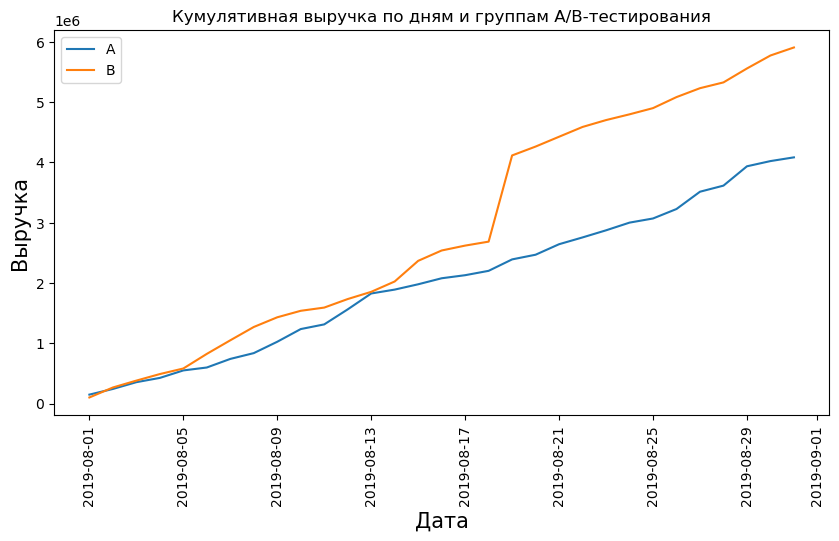

In [56]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим грыфик выручки 
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Выручка', fontsize=15)
plt.title("Кумулятивная выручка по дням и группам A/B-тестирования", fontsize=12)
plt.legend() 
plt.xticks(rotation=90)
plt.show()

  
<font color='black'>Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построим графики кумулятивного среднего чека по дням по группам.

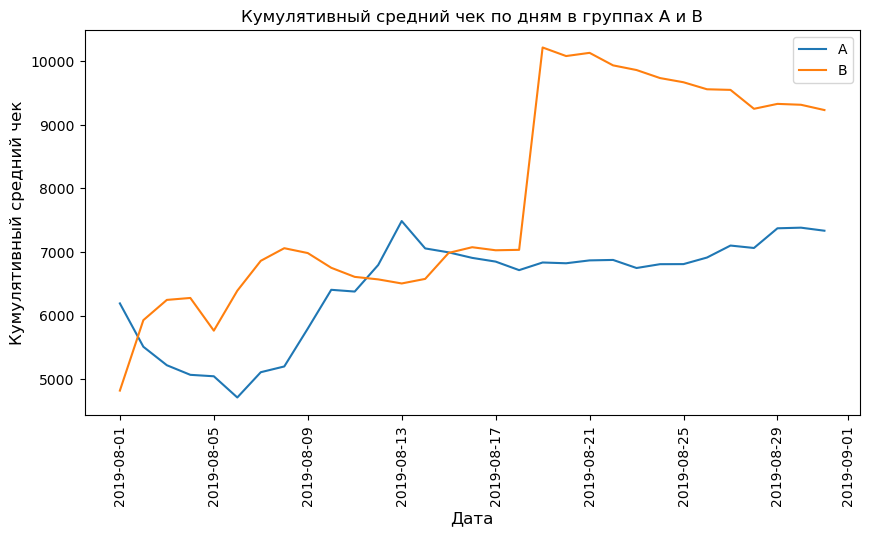

In [57]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=90)
plt.legend() 
plt.show()

Ситуация с кумулятивным средним чеком между группами не так однозначна: мы видим, что кривая группы В в период с 11 по 15 августа падает ниже уровня группы А, но затем резко растет, что еще раз подтверждает, что в группе В в период 18-19 августа была крупная покупка, которая увеличила размер кумулятивного среднего чека.

### Построим график относительно различия кумулятивного среднего чека группы B к группе A.

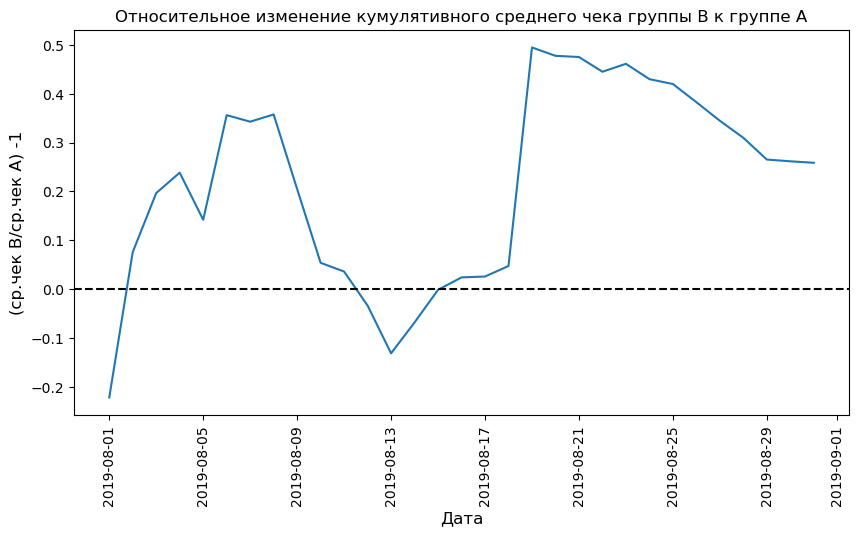

In [58]:
# Собираем данные в одном датафрейме:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(ср.чек В/ср.чек А) -1', fontsize=12)
plt.xticks(rotation=90)
plt.show()

В нескольких точках график различия между сегментами резко «скачет», видимо тогда были совершены аномальные заказы. Но в основном график расположен выше нуля.

### Построим график кумулятивной конверсии по группам.

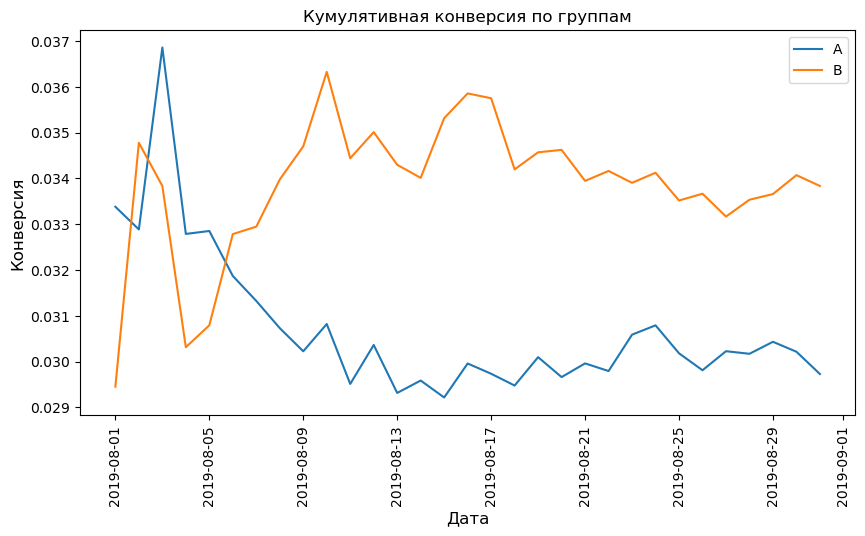

In [59]:
# Считаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Данные по группам:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=90)
plt.show()

В начале теста сегмент А имел большую конверсию, затем он немного упал и установился примерно около одного значения, в отличие от сегмента В, который возрос выше сегмента А и также установился в пределах одного значения. <br>
В общем, сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А.

### График относительного изменения кумулятивной конверсии группы B к группе A.

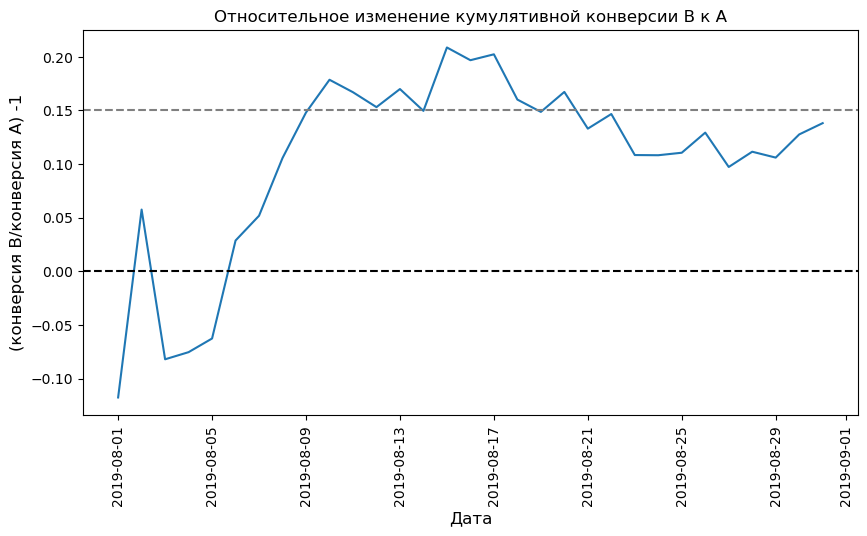

In [60]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Почти с самого начала теста группа B лидирует относительно группы А. Но не стоит говорить, что она зафиксировалась возле определенной цифры, но прирост становится примерно на 15%.

В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину. 

### Построим точечный график количества заказов по пользователям.

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

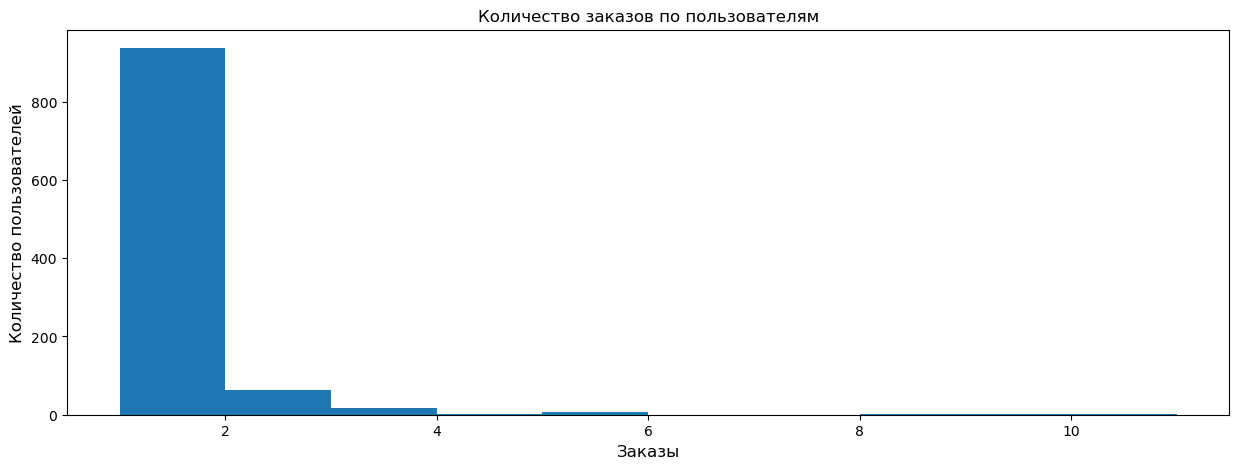

In [61]:
# Датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 
display(ordersByUsers['orders'].describe())

plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', fontsize=12)
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

Видим, что большая часть значений принадлежит диапазону от 1 до 2 заказов.

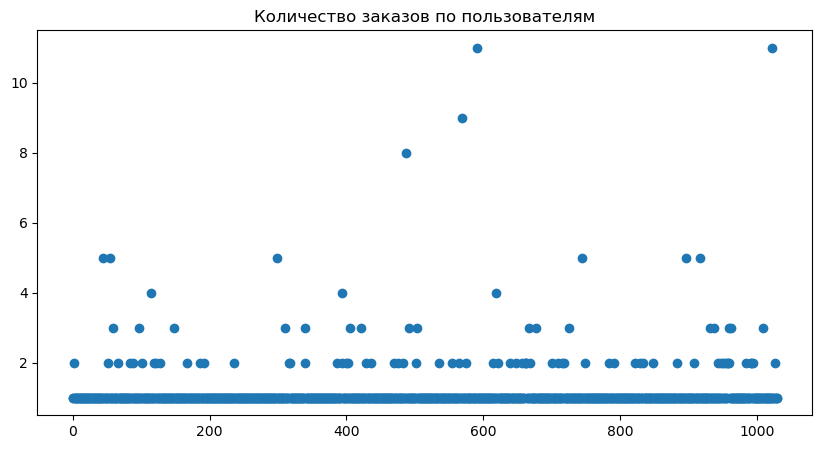

In [62]:
# Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.title('Количество заказов по пользователям', fontsize=12)
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Как и ранее, мы видим, что большая часть заказов принадлежит от 1 до 2 заказов на пользователя. Остальные значения, вероятно, являются выбросами.

### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы для аномальных пользователей.

In [63]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Видим, что не более 5% пользователей оформляли более 2-х заказов, и не более 1% - свыше 4-х заказов. Отсеим пользователей, у которых больше 3 заказов.

### Точечный график стоимостей заказов.

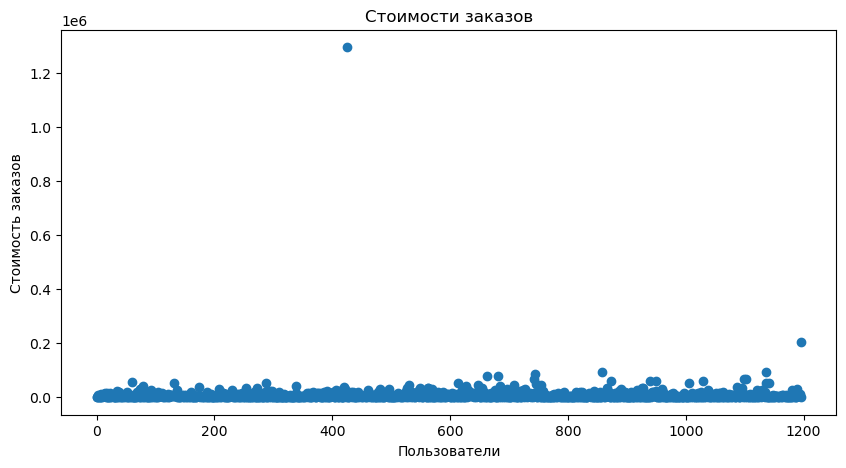

In [64]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.show()

Есть 2 выброса в районе 1 250 000, который выглядит весьма аномально, и 200 000. Посчитаем 95-й и 99-й перцентили стоимости заказов.

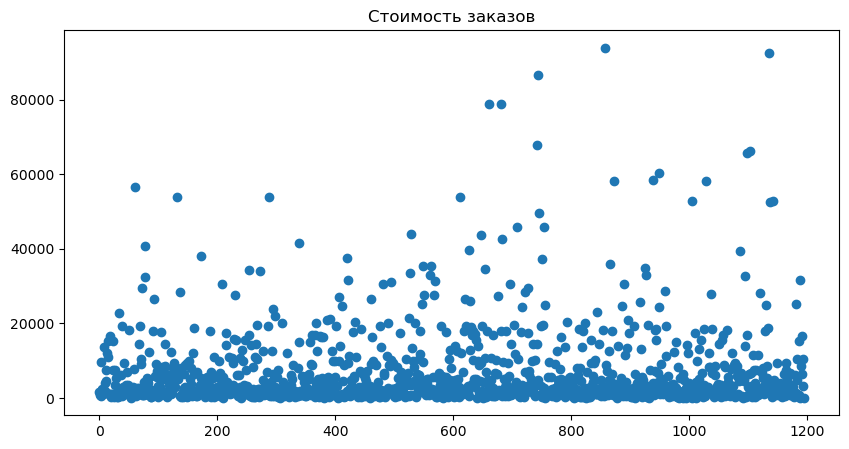

In [65]:
# Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 150 тыс:
x_values = pd.Series(range(0,len(orders[orders['revenue']<=150000]['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders[orders['revenue']<=150000]['revenue']) 
plt.title('Стоимость заказов', fontsize=12)
plt.show()

На графике видим заказ на 1,3 млн и на 200 тысяч, которые явно выбиваются из общего порядка. Посчитаем перцентили для отсева.

### Расчет 95-й и 99-й перцентили стоимости заказов. Определение границы для аномальных заказов.

In [66]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [95, 99]))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
5       182168103   935554773 2019-08-15     2210     B
6       398296753  2900797465 2019-08-15     1860     B
7      2626614568    78758296 2019-08-15     1044     A
8      1576988021   295230930 2019-08-15    13710     A
9      1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]


Не более 5% пользователей оформляли заказы на сумму более 28 000. И 1% пользователей заказывали на сумму более 58 233. 

### Статистическая значимость различий в конверсии между группами по «сырым» данным. 

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitor_id', 'transaction_id']`, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. Объявим переменные `sampleA` и `sampleB`, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Посчитаем статистическую значимость различия среднего количества заказов по результатам двух недель теста.

In [67]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [68]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [69]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'transaction_id']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'transaction_id'] 

# Создадим списки с числом заказов каждого пользователя, включая нули:
sampleA = pd.concat([ordersByUsersA['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transaction_id'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])), name='orders')],axis=0)

In [70]:
# Функция для проверки гипотезы о равенстве групп dataA и dataB
def stat_significance(dataA, dataB):
    # Нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу: разницы нет между группами")
    
    print("Относительный выигрыш/проигрыш В к А: {0:.1%}".format(dataB.mean()/dataA.mean()-1))

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [71]:
stat_significance(sampleA, sampleB)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 13.8%


P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13.8%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Сравним "средние чеки" по сырым данным, а затем проделаем те же самые действия с выборкой без выбросов.

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [72]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу: разницы нет между группами
Относительный выигрыш/проигрыш В к А: 25.9%


P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%. Почbтим данные и посчитаем те же метрики.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.

Приступаем к подготовке очищенных от аномалий данных. Напомним, что 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 рублям. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. Удалять нужно именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 10 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [73]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transaction_id'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['transaction_id'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.head(5))
print('Количество "аномальных" пользователей:', abnormalUsers.shape[0]) 

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
Name: visitor_id, dtype: int64
Количество "аномальных" пользователей: 53


In [74]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['transaction_id'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transaction_id'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [75]:
stat_significance(sampleAFiltered, sampleBFiltered)

P-value: 0.019
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 14.4%


Как и в случае с сырым данными, статистическая значимость достигнута. Сегмент В лучше сегмента А. <br>
По очищенным данным между конверсиями групп А и В по-прежнему есть статистически значимая разница. При этом относительный выигрыш группы В вырос на 2% по сравнению с "сырыми" данными и стал равен 14.4%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

За нулевую гипотезу возьмём что: "статистически значимых различий в конверсии между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [76]:
(stat_significance(
    orders[(orders['group']=='A') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & ~(orders['visitor_id'].isin(abnormalUsers))]['revenue'])
)

P-value: 0.979
Не получилось отвергнуть нулевую гипотезу: разницы нет между группами
Относительный выигрыш/проигрыш В к А: -1.7%


По-прежнему, нет оснований считать, что средний чек группы В отличается от среднего чека группы А. По очищенным данным проигрыш среднего чека группы В относительно А составляет 1.7%.

### Результаты теста и решение

Во втрой часте работы было выполено следующее:

- Построены графики кумулятивных метрик: выручки, среднего чека и конверсии по группам и графики относительного изменения среднего чека и конверсии группы B к группе A;
- Проведён анализ выбросов - посчитаны 95 и 99 перцентили числа и стоимости заказов, определены "аномальные" пользователи, к ним отнести пользователей совершивших более 3 заказов или заказ более чем на 28 тыс руб;
- Посчитана статистическая значимость различий в конверсии и среднем чеке как по исходным данным, так и по данным без выбросов.

Были получены следующие результаты:

**По исходным данным:**

- при проведении тестов с использованием критерия Манна-Уитни мы видим, что гипотеза о равенстве конверсии между группами отвергнута, а относительная разница конверсии группы В на 14.4% больше, чем в группе А.;
- по среднему чеку различий нет, средний чек в групе B относительно группы A выше на 26% (тут заметно влияние единичного заказа на очень большую сумму).

**По данным без выбросов:**

- между конверсией в группах есть статистически важные различия, конверсия в групе B относительно группы A выше на 15%;
- по среднему чеку различий также не появилось, хотя средний чек в "чистой" групе B относительно группы A теперь наоборот, ниже на 1,7% (это логично, т.к.обычно количество покупок растёт при уменьшении цены).

По анализу результатов A/B-теста принято решение остановить тест, зафиксировав победу тестовой группы. Группа B статистически лучше группы A по метрике конверсии, но различий в средних чеках нет.<br>
Если целью тестирования было установить изменилась ли сумма среднего чека, то она осталась прежней, мы видим лишь незначительные изменения. Если же целью являлось изменение конверсии и связанное с ней получение дополнительной прибыли в перспективе, то результаты тестирования группы В говорят о том, что ее конверсия отличается от группы А на 14-19%.